<a href="https://colab.research.google.com/github/JulioLaz/001-angular/blob/main/inmersion_datos_aula_2_ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Calcular el promedio de area para cada uno de los barrios y hacer grafico con top 10

In [459]:
import pandas as pd

##Abrir base de datos

In [460]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/inmuebles_bogota.csv')
data.head(10)

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000
5,Apartamento,Apartamento en venta en Bella Suiza,1,2,62,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 510.000.000
6,Apartamento,Apartamento en venta en Bella Suiza,1,2,62,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 500.000.000
7,Apartamento,Apartamento en venta en Bella Suiza,3,4,212,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 2.350.000.000
8,Apartamento,Apartamento en venta en El Chicó,3,2,159,El Chicó,CHAPINERO: Chicó Lago + El Refugio,$ 850.000.000
9,Apartamento,Apartamento en venta en Bella Suiza,2,2,80,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 642.000.000


In [461]:
data.shape

(9520, 8)

#RENOMBRAR COLUMNAS

In [462]:
columnas_dict={'Baños':'Banos', 'Área':'Area'}
data=data.rename(columns=columnas_dict)
data.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


# Inicio trabajo de correccion

##Busco en barrio Modelia el index con error de area:

##El index=7073 tiene un error en el area

In [463]:
data.iloc[7073]

Tipo                                Casa
Descripcion     Casa en venta en Modelia
Habitaciones                           4
Banos                                  3
Area                              166243
Barrio                           Modelia
UPZ                             Fontibón
Valor                      $ 850.000.000
Name: 7073, dtype: object

##busco en Barrio "Modelia" con las condiciones:

Casa con 4 habitaciones y 3 banos y luego calcule el promedio de area

In [464]:
filas_4habitaciones_3banos_casa = data.loc[(data['Barrio'].isin(['Modelia']))&(data['Habitaciones'].isin([4]))&(data['Banos'].isin([3]))&(data['Tipo'].isin(['Casa']))]

In [465]:
filas_4habitaciones_3banos_casa

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
6315,Casa,Casa en venta en Modelia,4,3,209,Modelia,Fontibón,$ 850.000.000
6619,Casa,Casa en venta en Modelia,4,3,209,Modelia,Fontibón,$ 850.000.000
7073,Casa,Casa en venta en Modelia,4,3,166243,Modelia,Fontibón,$ 850.000.000


##Separo por tipo

##elimino el index 7073 del df: filas_4hab_3banos_casa. para calcular mean()

In [466]:
filas_4hab_3banos_casa=filas_4habitaciones_3banos_casa.drop(7073)
filas_4hab_3banos_casa

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
6315,Casa,Casa en venta en Modelia,4,3,209,Modelia,Fontibón,$ 850.000.000
6619,Casa,Casa en venta en Modelia,4,3,209,Modelia,Fontibón,$ 850.000.000


##CALCULO EL PROMEDI0

> Aunque es evidente que la media es 209, pero el metodo es este:



In [467]:
filas_4hab_3banos_casa.Area.mean()

209.0

##Modifico DF original al index 7073 con area = 209

##NUEVO DataFrame con barrios y promedios de areas corregidos:

In [468]:
data_new=data
data_new.at[7073, 'Area'] = 209
data_new.iloc[7073]

Tipo                                Casa
Descripcion     Casa en venta en Modelia
Habitaciones                           4
Banos                                  3
Area                                 209
Barrio                           Modelia
UPZ                             Fontibón
Valor                      $ 850.000.000
Name: 7073, dtype: object

In [469]:
data_new.describe().round()

,Habitaciones,Banos,Area
count,9520.00,9520.00,9520.00
mean,3.00,2.00,129.00
std,2.00,1.00,315.00
min,1.00,0.00,2.00
25%,2.00,2.00,57.00
50%,3.00,2.00,80.00
75%,3.00,3.00,135.00
max,110.00,9.00,15920.00


In [470]:
data_new.Area.max().round()

15920

In [471]:
#busco barrios con areas > 1000
#areas_grandes=data.loc[(data['Area'] > 1000)]
#areas_grandes

In [472]:
#data_new.info()

#AGRUPO POR BARRIOS

In [473]:
# lista de todos los barrios
inmuebles=data_new
inmuebles.groupby('Barrio') ## Agrupa por barrios b1...,b1....

promedio_por_barrio= inmuebles.groupby('Barrio')['Area'].mean().sort_values(ascending=False) # selecciona la columna "Area" y se aplica la función mean() para calcular el promedio de "area" para cada "barrio"
mediana_por_barrio= inmuebles.groupby('Barrio')['Area'].median().sort_values(ascending=False)
conteo_por_barrio= inmuebles.groupby('Barrio')['Area'].count().sort_values(ascending=False)
moda_por_barrio= inmuebles.groupby('Barrio')['Area'].apply(lambda x: x.mode()).sort_values(ascending=False)
minimo_por_barrio= inmuebles.groupby('Barrio')['Area'].min().sort_values(ascending=False)
maximo_por_barrio= inmuebles.groupby('Barrio')['Area'].max().sort_values(ascending=False)


In [474]:
promedio_por_barrioss= data.loc[(data['Area']>1000)]

In [475]:
promedio_por_barrioss

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
1037,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,5458,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 178.000.000
1480,Casa,Casa en venta en Bosa,12,7,1100,Bosa,Bosa Central,$ 330.000.000
1783,Apartamento,Apartamento en venta en El Chicó,3,5,1550,El Chicó,CHAPINERO: Chicó Lago + El Refugio,$ 13.200.000.000
1798,Casa,Casa en venta en Zona Noroccidental,4,3,1182,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 1.344.332.000
1860,Apartamento,Apartamento en venta en Barrios Unidos,3,2,6267,Barrios Unidos,Los Andes,$ 143.000.000
1903,Finca,Finca en venta en Barrios Unidos,6,6,1596,Barrios Unidos,Los Andes,$ 939.275.008
1951,Casa,Casa en venta en La Soledad,7,3,1350,La Soledad,Teusaquillo,$ 2.800.000.000
1955,Local,Local en venta en Quinta Camacho,16,9,1050,Quinta Camacho,CHAPINERO: Chicó Lago + El Refugio,$ 5.299.999.744
2128,Casa,Casa en venta en Usaquén,3,4,1200,Usaquén,Usaquén,$ 2.200.000.000
2154,Local,Local en venta en Quinta Camacho,16,9,1050,Quinta Camacho,CHAPINERO: Chicó Lago + El Refugio,$ 5.299.999.744


In [476]:
df_barrio_area=pd.DataFrame(promedio_por_barrio)

In [477]:
df_barrio_area

,Area
Barrio,
Libertador,642.00
Bosa Piamonte,400.00
La Soledad,378.62
Restrepo,336.50
Santa Librada,328.00
...,...
La Merced,41.00
El Tunal,41.00
San Diego,40.67


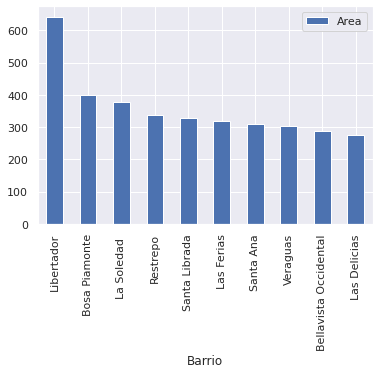

In [478]:
df_barrio_area.head(10).plot.bar();

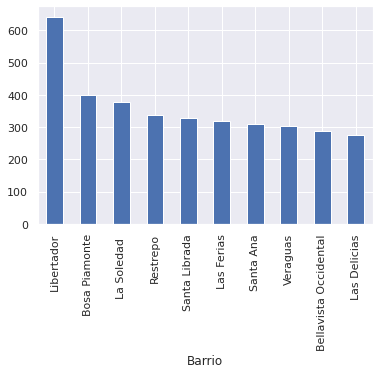

In [479]:
promedio_areas_por_barrio = data.groupby('Barrio')['Area'].mean()
top_10 = promedio_areas_por_barrio.nlargest(10)
top_10.head(10).plot.bar();

In [480]:
# lista de todos los barrios
inmuebles=data
inmuebles.groupby('Barrio') ## Agrupa por barrios b1...,b1....

promedio_por_barrio= inmuebles.groupby('Barrio')['Area'].mean().sort_values(ascending=False) # selecciona la columna "Area" y se aplica la función mean() para calcular el promedio de "area" para cada "barrio"
mediana_por_barrio= inmuebles.groupby('Barrio')['Area'].median().sort_values(ascending=False)
conteo_por_barrio= inmuebles.groupby('Barrio')['Area'].count().sort_values(ascending=False)
moda_por_barrio= inmuebles.groupby('Barrio')['Area'].apply(lambda x: x.mode()).sort_values(ascending=False)
minimo_por_barrio= inmuebles.groupby('Barrio')['Area'].min().sort_values(ascending=False)
maximo_por_barrio= inmuebles.groupby('Barrio')['Area'].max().sort_values(ascending=False)

#BUSCAR LIST TOP 10 BARRIO PROMEDIO AREA

In [481]:
barrio_top10_mean=promedio_por_barrio.head(10)
barrio_top10_mean

Barrio
Libertador              642.00
Bosa Piamonte           400.00
La Soledad              378.62
Restrepo                336.50
Santa Librada           328.00
Las Ferias              320.00
Santa Ana               309.38
Veraguas                302.67
Bellavista Occidental   286.20
Las Delicias            276.33
Name: Area, dtype: float64

In [482]:
unique_barrio = []
[unique_barrio.append(sweet) for sweet in barrio_top10_mean.index if sweet not in unique_barrio]
#print(unique_sweets)
type(unique_barrio)
unique_barrio

['Libertador',
 'Bosa Piamonte',
 'La Soledad ',
 'Restrepo',
 'Santa Librada',
 'Las Ferias',
 'Santa Ana',
 'Veraguas',
 'Bellavista Occidental',
 'Las Delicias']

In [483]:
type(promedio_por_barrio)

pandas.core.series.Series

<Axes: xlabel='Barrio'>

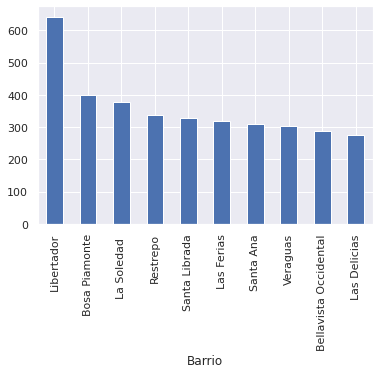

In [484]:
promedio_por_barrio.head(10).plot.bar()

In [485]:
df_area_prom_x_barrios=data.groupby('Barrio')['Area'].describe().sort_values(by='mean',ascending=False)
#df_area_prom_x_barrios.head(10)
lista_barrios=list(data.Barrio)

In [486]:
import itertools

In [487]:
unique_sweets = []
[unique_sweets.append(sweet) for sweet in lista_barrios if sweet not in unique_sweets]
#print(unique_sweets)
type(unique_sweets)
unique_sweets

['Zona Noroccidental',
 'Castilla',
 'Chico Reservado',
 'Usaquén',
 'Bella Suiza',
 'El Chicó',
 'Tintala',
 'Marly',
 'Kennedy',
 'Nicolas De Federman',
 'La Calleja',
 'Mazuren',
 'Suba',
 'Barrios Unidos',
 'Engativa',
 'Fontibón',
 'Villa Alsacia',
 'Palermo',
 'La Candelaria',
 'El Contador',
 'El Batán',
 'Santa Barbara',
 'Mirandela ',
 'Cedritos',
 'Colina Campestre',
 'Hayuelos',
 'Ciudad Salitre',
 'Quinta Paredes',
 'Candelaria La Nueva',
 'Chico Norte',
 'Normandia',
 'Ciudad Bolívar',
 'Bosa',
 'Rafael Uribe Uribe',
 'Las Villas',
 'Modelia',
 'San Patricio',
 'Barrancas',
 'Teusaquillo',
 'Puente Aranda',
 'Chapinero',
 'Usme',
 'Nueva Zelandia',
 'Madelena',
 'El Plan',
 'Santa Paula',
 'Villemar',
 'Santa Fe',
 'Antonio Nariño',
 'La Uribe',
 'Los Rosales',
 'Chapinero Central',
 'Los Mártires',
 'Bogotá D.C',
 'San Cristobal',
 'Boyaca ',
 'Timiza',
 'Gran America',
 'Costa Azul',
 'Gran Granada',
 'La Salle',
 'Portales Del Norte',
 'Cantagallo',
 'Ciudad Berna',
 'V

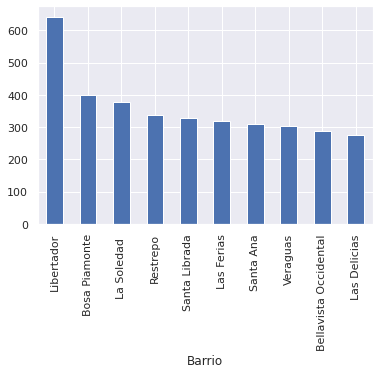

In [488]:
df_area_prom_x_barrios['mean'].head(10).plot.bar();

#convertir la columna valor de string a numero

In [489]:
#con split separo el $ del numero y con expand lo devuelvo como un dataframe
valor=data_new.Valor.str.split(expand=True)
data_new['Moneda']=valor[0]
data_new['Precio']=valor[1]
data_new.head(2)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670.000.000


In [490]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
 8   Moneda        9520 non-null   object
 9   Precio        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


In [491]:
data_new['Precio']=data_new['Precio'].str.replace('.','',regex=True)

In [492]:
data_new[['Precio','Barrio']]

,Precio,Barrio
0,360000000,Zona Noroccidental
1,670000000,Castilla
2,1120000000,Chico Reservado
3,890000000,Usaquén
4,970000000,Bella Suiza
...,...,...
9515,290000000,Kennedy
9516,670000000,Parque Central Bavaria
9517,900000000,Restrepo
9518,335000000,Engativa


In [493]:
data_new['Precio_millon']=data_new.Precio.astype('float64')/1000000

In [494]:
#Podemos ver:index 10  Precio_millon  9520 non-null   float64
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banos          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio_millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


In [495]:
data_new.head(2)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_millon
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00


In [496]:
data_new.describe()

,Habitaciones,Banos,Area,Precio_millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,129.22,602.06
std,2.05,1.26,314.91,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,15920.00,16000.00



#Quitar ceros a los valores

In [497]:
pd.set_option('display.precision',0)
pd.set_option('display.float_format',lambda x:'%.0f' % x)
data_new.describe()

,Habitaciones,Banos,Area,Precio_millon
count,9520,9520,9520,9520
mean,3,2,129,602
std,2,1,315,705
min,1,0,2,60
25%,2,2,57,250
50%,3,2,80,409
75%,3,3,135,680
max,110,9,15920,16000


In [498]:
data_new.loc[data_new.Habitaciones==110]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_millon
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,$,480000000,480


In [499]:
data_new.loc[data_new.Area==2]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_millon
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,$,180000000,180


<Axes: ylabel='Frequency'>

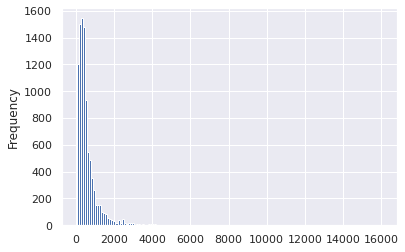

In [500]:
data_new['Precio_millon'].plot.hist(bins=150)

In [501]:
import matplotlib.pyplot as plt
import seaborn as sns

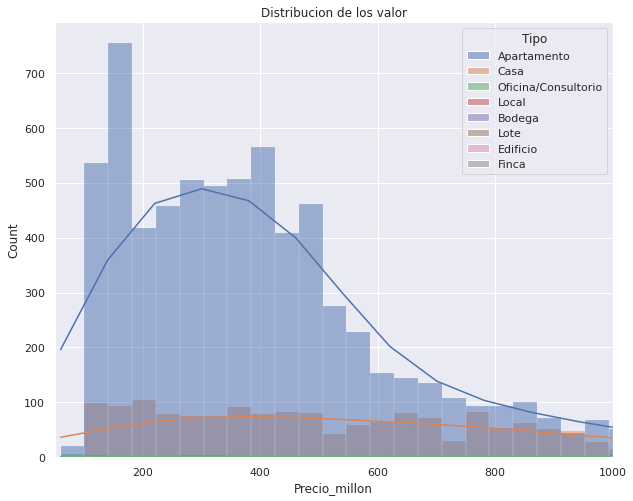

In [502]:
plt.figure(figsize=(10,8))
grafica=sns.histplot(data=data_new,x='Precio_millon',kde=True,hue='Tipo')
grafica.set_title('Distribucion de los valor')
plt.xlim((50,1000))
#plt.ylim((0,30))
plt.savefig('/content/drive/MyDrive/Colab Notebooks/valor_inmuebles.png',format='png')
plt.show()

In [503]:
data_new.loc[data_new.Habitaciones==110]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_millon
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,$,480000000,480


In [504]:
#sns.displot(data=data_new, x='Precio_millon', col='Barrio', kind='kde', hue='Habitaciones');
data_top10_4hab_4banos=data_new.loc[(data_new.Banos>=5)&(data_new.Habitaciones>=4)]
#sns.displot(data=data_top10_4hab_4banos, x='Precio_millon', hue='Barrio');

#Eliminar columnas

In [505]:
data_new.drop(['Valor','Precio','Moneda'], axis=1,inplace=True)
data_new

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Precio_millon
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,360
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,670
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,1120
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,890
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,970
...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,290
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,670
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,900
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,335


In [506]:
pd.set_option('display.precision',2)
pd.set_option('display.float_format',lambda x:'%.2f' % x)
data_new['$mll/m2']=data_new.Precio_millon/data_new.Area

In [507]:
data_new.rename(columns={'Precio_millon':'Precio($mll)'},inplace=True)
data_new.columns

Index(['Tipo', 'Descripcion', 'Habitaciones', 'Banos', 'Area', 'Barrio', 'UPZ',
       'Precio($mll)', '$mll/m2'],
      dtype='object')

In [508]:
data_new.head(10)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Precio($mll),$mll/m2
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,360.00,5.14
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,670.00,3.94
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,1120.00,7.78
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,890.00,5.78
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,970.00,7.58
5,Apartamento,Apartamento en venta en Bella Suiza,1,2,62,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,510.00,8.23
6,Apartamento,Apartamento en venta en Bella Suiza,1,2,62,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,500.00,8.06
7,Apartamento,Apartamento en venta en Bella Suiza,3,4,212,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,2350.00,11.08
8,Apartamento,Apartamento en venta en El Chicó,3,2,159,El Chicó,CHAPINERO: Chicó Lago + El Refugio,850.00,5.35
9,Apartamento,Apartamento en venta en Bella Suiza,2,2,80,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,642.00,8.03


In [509]:
print(barrio_top10_mean)

Barrio
Libertador              642.00
Bosa Piamonte           400.00
La Soledad              378.62
Restrepo                336.50
Santa Librada           328.00
Las Ferias              320.00
Santa Ana               309.38
Veraguas                302.67
Bellavista Occidental   286.20
Las Delicias            276.33
Name: Area, dtype: float64


In [510]:
barrios_top10=unique_barrio
data_top10_barrio = data.loc[(data['Barrio'].isin(barrios_top10))]
data_top10_barrio.sample(10)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Precio($mll),$mll/m2
3643,Local,Local en venta en Restrepo,13,6,600,Restrepo,Restrepo,1300.00,2.17
8374,Apartamento,Apartamento en venta en Restrepo,3,2,48,Restrepo,Restrepo,230.00,4.79
3552,Apartamento,Apartamento en venta en Santa Ana,5,6,500,Santa Ana,Usaquén,5000.00,10.00
1684,Apartamento,Apartamento en venta en Santa Ana,2,3,108,Santa Ana,Usaquén,780.00,7.22
1103,Casa,Casa en venta en Santa Ana,4,6,674,Santa Ana,Usaquén,8800.00,13.06
4094,Casa,Casa en venta en Las Ferias,11,6,320,Las Ferias,ENGATIVÁ: Santa Cecilia + Jardín Botánico,550.00,1.72
6941,Casa,Casa en venta en Bellavista Occidental,9,5,456,Bellavista Occidental,Las Ferias,980.00,2.15
1264,Apartamento,Apartamento en venta en Veraguas,3,2,71,Veraguas,Santa Isabel,280.00,3.94
4861,Edificio,Edificio en venta en Veraguas,9,5,1200,Veraguas,Santa Isabel,3000.00,2.50
6878,Casa,Casa en venta en Libertador,4,2,300,Libertador,Bosa Occidental,540.00,1.80


In [511]:
len(data_top10_barrio)

50

<Figure size 720x720 with 0 Axes>

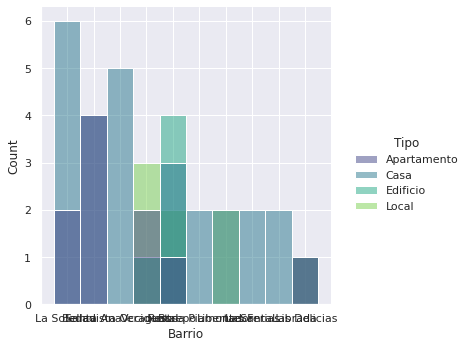

In [512]:
plt.figure(figsize=(10,10))
graf_01=sns.displot(data=data_top10_barrio,x='Barrio',hue='Tipo',palette='viridis');
# graf_01

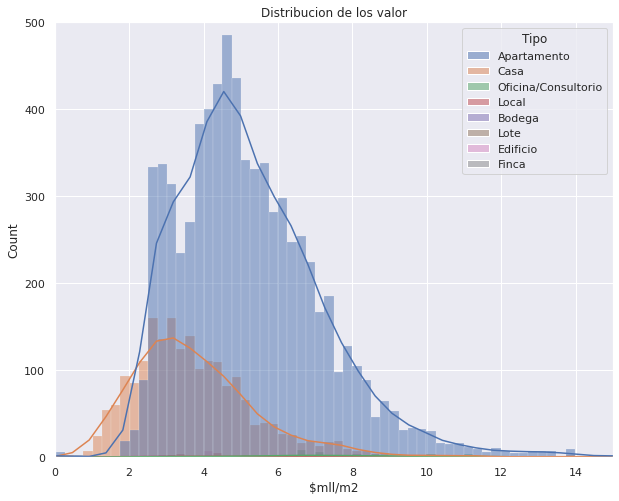

In [531]:
plt.figure(figsize=(10,8))
grafica=sns.histplot(data=data_new,x='$mll/m2',kde=True,hue='Tipo')
grafica.set_title('Distribucion de los valor')
plt.xlim((0,15))
plt.ylim((0,500))
plt.savefig('/content/drive/MyDrive/Colab Notebooks/precio_m2.png',format='png')
plt.show()

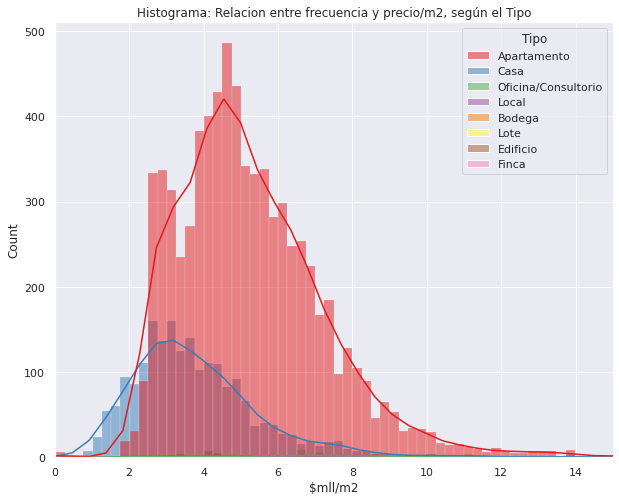

In [530]:
plt.figure(figsize=(10,8));
grafica00=sns.histplot(data=data_new,x='$mll/m2',hue='Tipo', kde=True,palette='Set1');
grafica00.set_title('Histograma: Relacion entre frecuencia y precio/m2, según el Tipo');
plt.xlim((0,15));

<ipython-input-522-30d28d2b9f54>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=data_new, x='$mll/m2', col='Tipo', kde=True,palette='viridis');


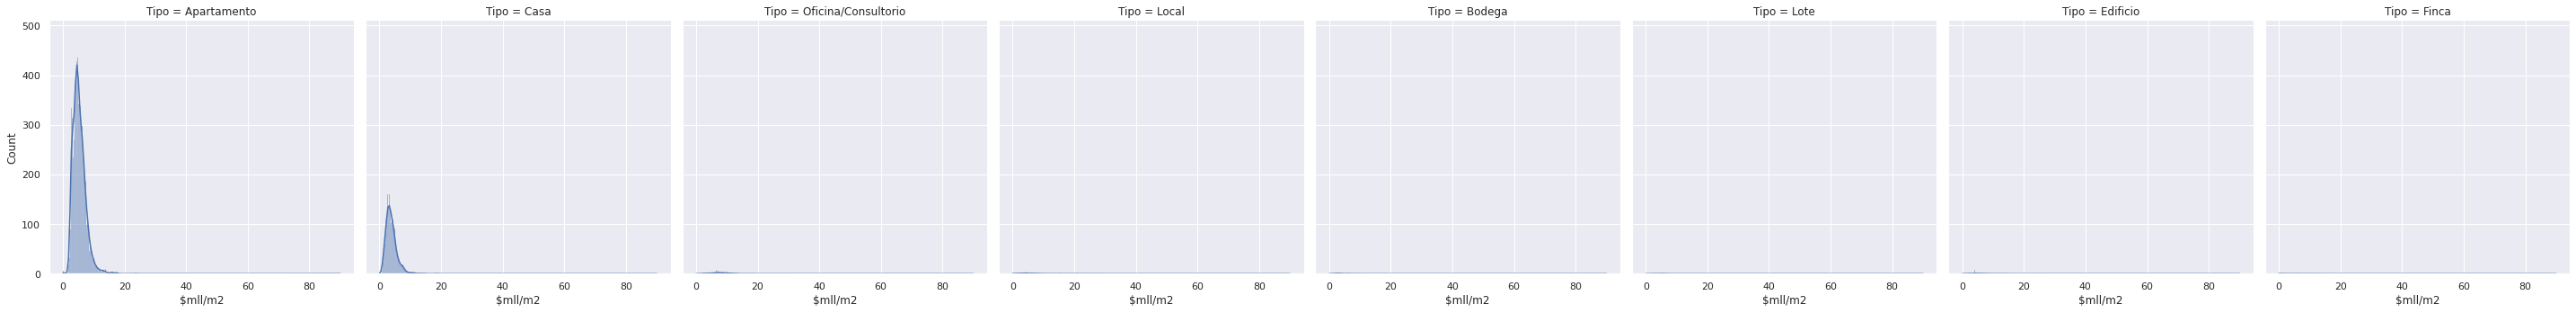

In [522]:
sns.displot(data=data_new, x='$mll/m2', col='Tipo', kde=True,palette='viridis');